# **(2) Bivariate Exploratory Data Analysis (EDA):**

## **Import Used Libraries and Modules:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import adjustText as adt

## **Export Target Dataframe (cleaned_bayut_egypt.csv):**

In [2]:
df = pd.read_csv('D:\\IT Courses\\Data Analysis Courses\\Data Analysis Projects\\Bayut Egypt Real Estate Project\\Bayut_Egypt_Real_Estate_Website_Data_Analysis_Project\\Dataset\\cleaned_bayut_egypt.csv')

## **(2) Bivariate Analysis:**

### **2.1. Districts VS. Median Price Analysis:**

In [3]:
districts_price_group = df.groupby(
    by=['general_district']
).agg(
    district_frequency=('general_district', 'size'),
    median_price=('price', 'median')
).sort_values(
    by='district_frequency',
    ascending=False
).drop(
    index='Other'
).head(20).sort_values(
    by=['median_price'],
    ascending=False
)

In [4]:
districts_price_group

,district_frequency,median_price
general_district,,
New Heliopolis,62,9050000.0
Zamalek,15,8700000.0
6th settlement,88,8450000.0
5th settlement,2943,8100000.0
Sheraton,130,7550450.5
1st settlement,603,7000000.0
Rehab City,62,7000000.0
Madinaty,674,6380000.0
Katameya,179,6200000.0


**(1) Bar Chart Plot:**

Text(0.5, 1.0, 'Districts Vs. Median Apartment Price')

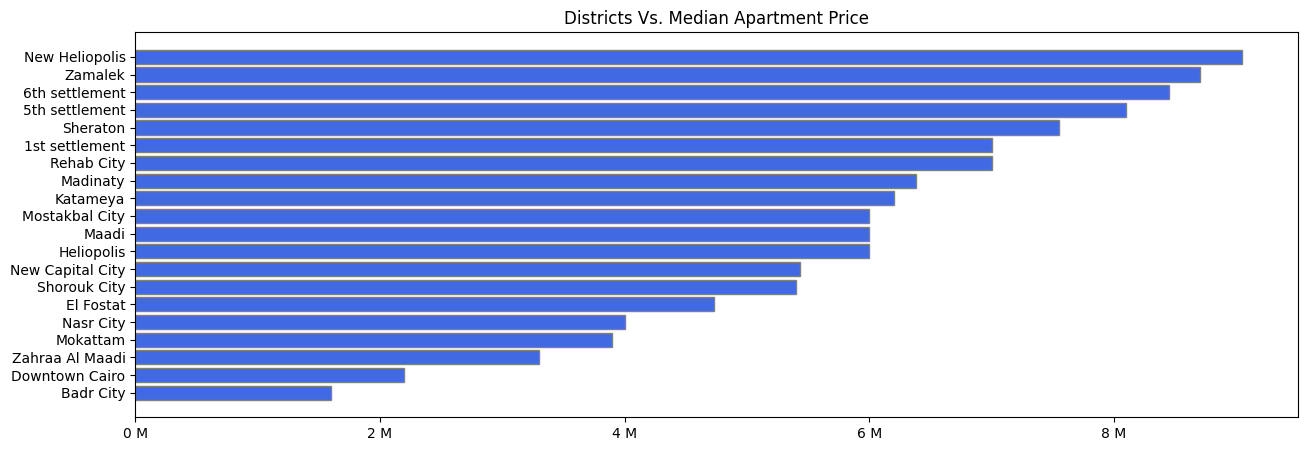

In [5]:
plt.figure(figsize=(15,5))
plt.barh(
    districts_price_group.index,
    districts_price_group['median_price'],
    color='royalblue',
    edgecolor='grey'
)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x / 1000000)} M')))
plt.title('Districts Vs. Median Apartment Price')

**(2) Heatmap Plot:**

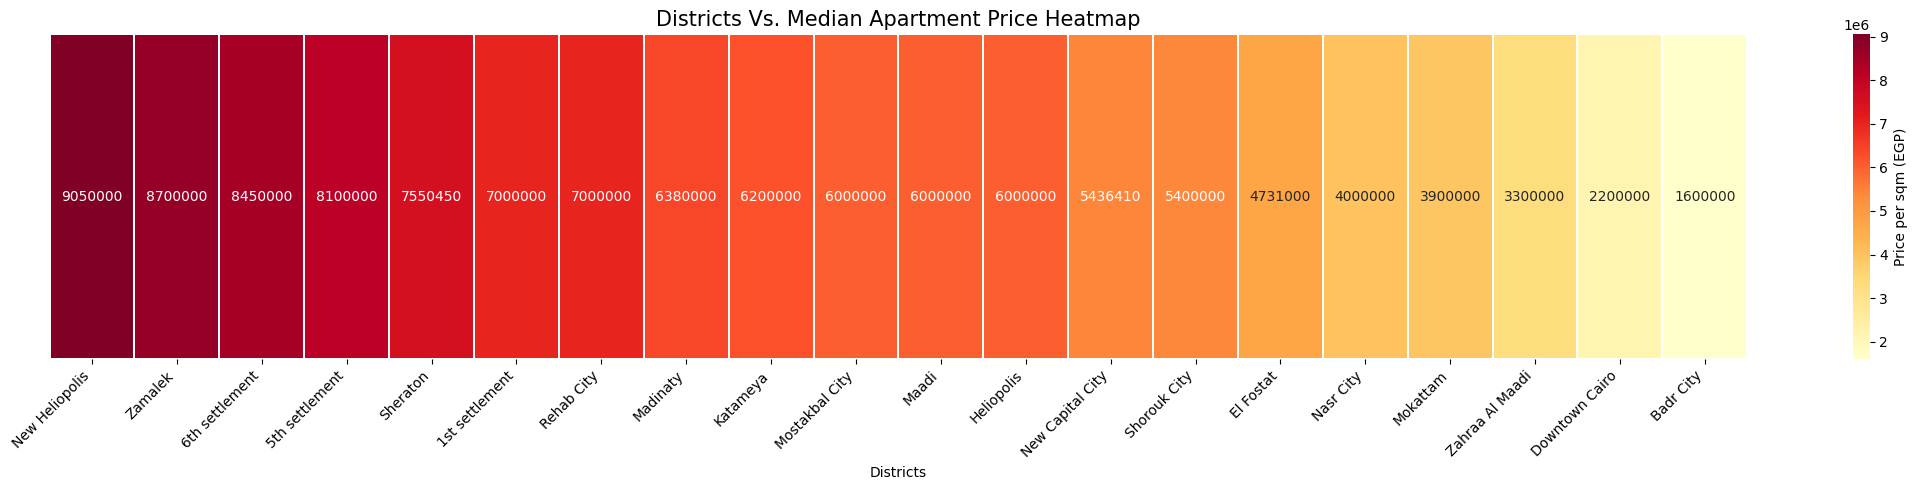

In [6]:
plt.figure(figsize=(22, 5))
sns.heatmap(
    (districts_price_group.drop(columns='district_frequency')).T,  
    annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.2,
    cbar_kws={'label': 'Price per sqm (EGP)'}
)
plt.title("Districts Vs. Median Apartment Price Heatmap", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks([])
plt.xlabel('Districts')
plt.tight_layout()
plt.show()

**Actionable Insights:**

- **Zamalek and New Heliopolis** are identified as the most expensive districts. **Focusing on luxury developments and premium marketing strategies in these areas to attract high-end buyers and maximize profitability**.

- **The 6th Settlement, the 5th Settlement, and Sheraton** are noted for their high median apartment prices. Focus on upscale projects and investments in these districts to cater to affluent market segments.

- Districts such as **the 1st Settlement, Rehab City, and Madinaty** offer moderate pricing. These areas present balanced opportunities for mid-range developments, appealing to a **wider audience**.

### **2.2. Districts VS. Median Price Per Square Meter (Sq.M.) Analysis:**

**(1) Bar Chart Plot:**

In [17]:
districts_price_m2_group= df.groupby(
    by=['general_district']
).agg(
    frequency=('general_district', 'size'),
    median_m2_price=('price_per_sq_m_2', 'median')
).sort_values(
    by=['frequency'],
    ascending=False
).drop(
    index='Other'
).head(20).sort_values(
    by=['median_m2_price'],
    ascending=False
)

Text(0.5, 1.0, 'Districts Vs. Median Apartment Price Per Square Meter (Sq.M.) In Thousands')

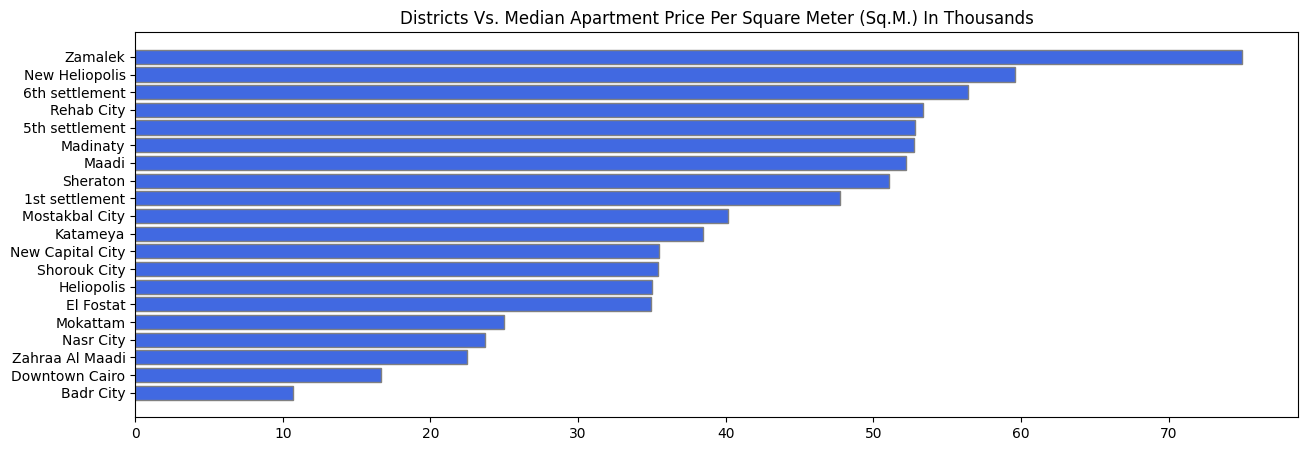

In [8]:
plt.figure(figsize=(15,5))
plt.barh(
    districts_price_m2_group.index,
    districts_price_m2_group['median_m2_price'],
    color='royalblue',
    edgecolor='grey'
)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x / 1000)}')))
plt.title('Districts Vs. Median Apartment Price Per Square Meter (Sq.M.) In Thousands')

**(2) Heatmap Plot:**

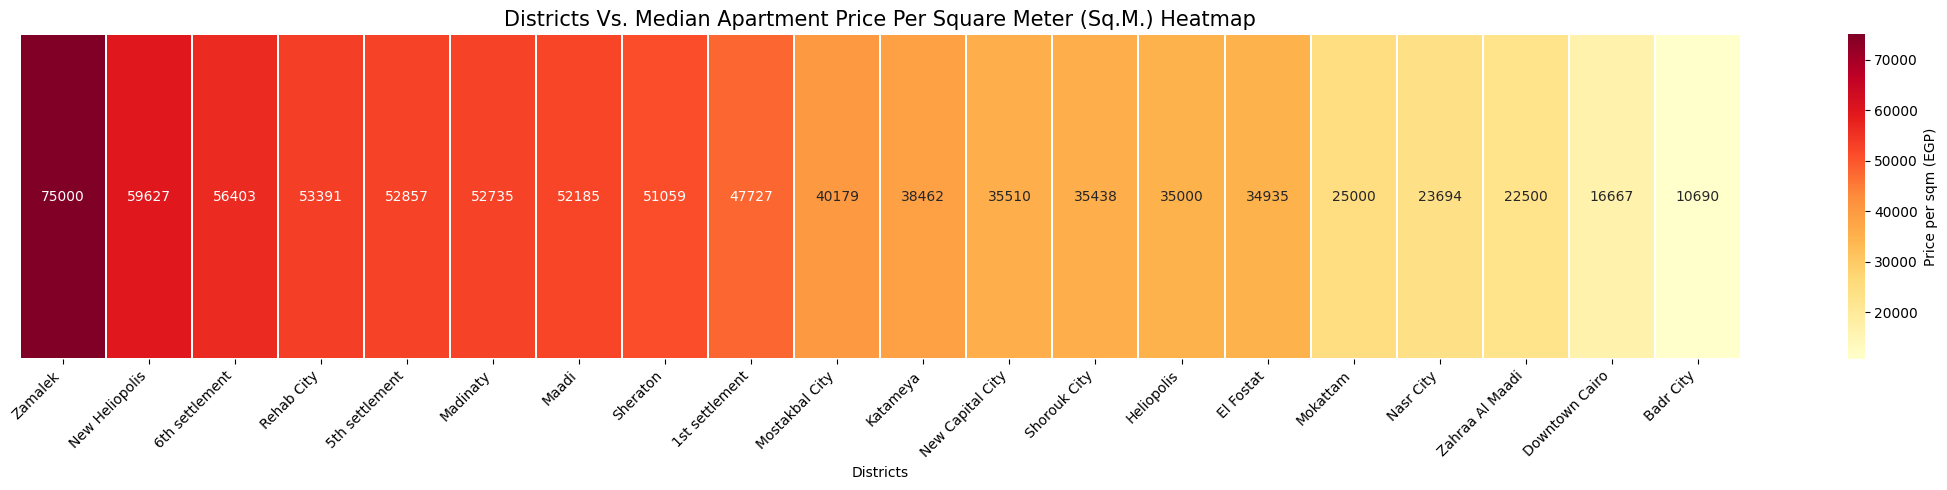

In [9]:
plt.figure(figsize=(22, 5))
sns.heatmap(
    (districts_price_m2_group.drop(columns='frequency')).T,  
    annot=True, fmt=".0f", cmap="YlOrRd", linewidths=0.2,
    cbar_kws={'label': 'Price per sqm (EGP)'}
)
plt.title("Districts Vs. Median Apartment Price Per Square Meter (Sq.M.) Heatmap", fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks([])
plt.xlabel('Districts')
plt.tight_layout()
plt.show()

**Actionable Insights:**

- **Zamalek and New Heliopolis** are the most expensive districts per square meter. **Focus on luxury developments and premium marketing strategies in these areas to attract high-end buyers and maximize profitability**.

- **The 6th Settlement and Rehab City** also exhibits high median apartment prices per square meter. **These areas should be prioritized for upscale projects and investments to cater to affluent market segments.**

- Districts such as **Madinaty, Maadi, and Sheraton offer moderate pricing per square meter**. These areas present balanced opportunities for mid-range developments, appealing to a wider audience.

- **Badr City, Downtown Cairo, and Zahraa Al Maadi are among the districts with the lowest median apartment prices per square meter.**


### **2.3. Best Value Districts (Low Price Per Sq. M.) Vs. Median Apartment Price Per Square Meter (Sq.M.) In Thousands:**

In [10]:
best_value_districts = df.groupby(
    by=['general_district']
).agg(
    district_frequency=('general_district', 'size'),
    median_price_per_sq_m_2=('price_per_sq_m_2', 'median')

).sort_values(
    by=['district_frequency'],
    ascending=False
).drop(
    index='Other'
).head(20).sort_values(
    by=['median_price_per_sq_m_2'],
    ascending=True
).head(10)
best_value_districts

,district_frequency,median_price_per_sq_m_2
general_district,,
Badr City,34,10690.480
Downtown Cairo,7,16666.670
Zahraa Al Maadi,65,22500.000
Nasr City,236,23693.955
Mokattam,43,25000.000
El Fostat,50,34935.485
Heliopolis,119,35000.000
Shorouk City,261,35437.500
New Capital City,698,35509.785


Text(0.5, 1.0, 'Best Value Districts (Low Price Per Sq. M.) Vs. Median Apartment Price Per Square Meter (Sq.M.) In Thousands')

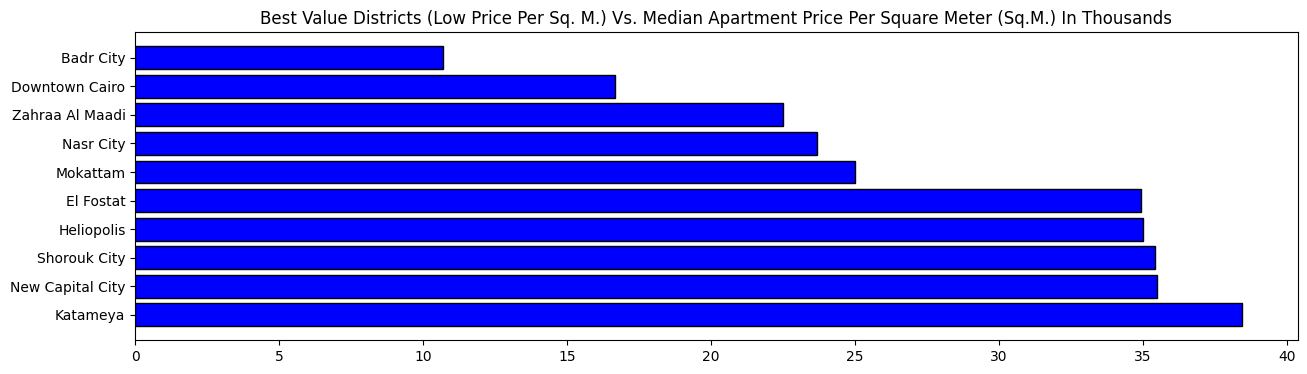

In [11]:
plt.figure(figsize=(15,4))
plt.barh(
    best_value_districts.index,
    best_value_districts['median_price_per_sq_m_2'],
    color='blue',
    edgecolor='black'
)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f"{int(x / 1000)}")))
plt.title('Best Value Districts (Low Price Per Sq. M.) Vs. Median Apartment Price Per Square Meter (Sq.M.) In Thousands', size=12)

**Actionable Insights:**

- Districts like **Badr City** and **Downtown Cairo** offer relatively **lower prices** compared to others, making them potentially **more affordable options**.

### **2.4. Apartment Configuration Vs. Median Price:**

In [12]:
apartment_configuration = df.groupby(
    by=['apartment_configuration']
).agg(
    median_price=('price', 'median'),
    frequency=('apartment_configuration', 'size')
).sort_values(
    by=['frequency'],
    ascending=False
).drop(
    index=[
        '1 - 2',
        '4 - 2',
        '2 - 4',
        '4 - 1'
        ]
).sort_values(
    by=['median_price'],
    ascending=False
).reset_index()

apartment_configuration

,apartment_configuration,median_price,frequency
0,4 - 4,10000000.0,82
1,3 - 4,8687000.0,68
2,2 - 3,8200000.0,243
3,4 - 3,7910600.0,205
4,3 - 3,7575000.0,2245
5,2 - 2,7100000.0,1376
6,3 - 2,6500000.0,2009
7,1 - 1,5020000.0,328
8,2 - 1,4550000.0,406
9,3 - 1,4425000.0,100


Text(0.5, 0, 'Median Price (Million)')

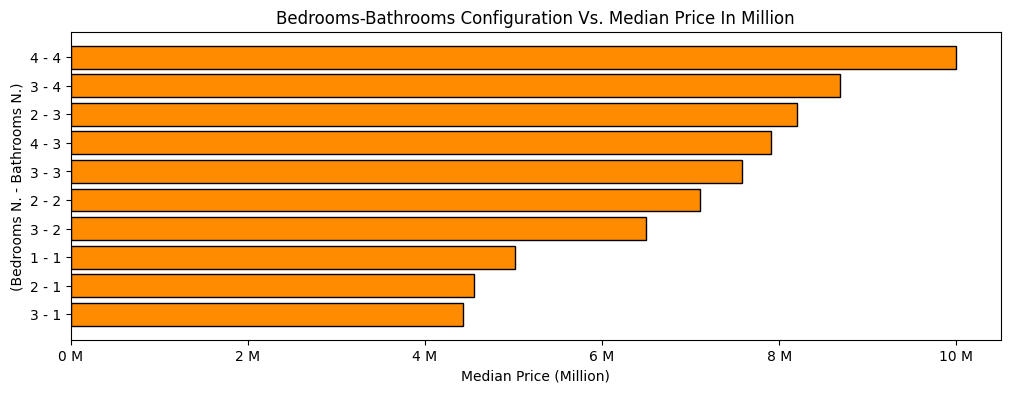

In [19]:
plt.figure(figsize=(12,4))
plt.barh(
    apartment_configuration.sort_values(by=['median_price'], ascending=False)['apartment_configuration'],
    apartment_configuration.sort_values(by=['median_price'], ascending=False)['median_price'],
    color='darkorange',
    edgecolor='black'
)
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: (f'{int(x / 1000000)} M')))
plt.title("Bedrooms-Bathrooms Configuration Vs. Median Price In Million")
plt.ylabel('(Bedrooms N. - Bathrooms N.)')
plt.xlabel('Median Price (Million)')

**Actionable Insights:**

- **Apartments with 4 bedrooms and 4 bathrooms** have the **highest median price**.

- The **median price** generally **increases** with **the number of bedrooms and bathrooms**.

- **Apartments with 3 bedrooms and 1 bathroom** have the **lowest median price**.

- **Adding an extra bathroom to the same number of bedrooms tends to increase the median price**.

- **Apartments with 2 bedrooms and 1 bathroom are priced lower than those with 2 bedrooms and 2 bathrooms**.

- **The median price for 3-bedroom apartments increases noticeably with each additional bathroom**.

### **2.5. Area (m2) vs. Median Price Correlation Analysis:**

In [14]:
area_median_price_correlation = df.groupby(
    by=['area_m2']
).agg(
    median_price=('price', 'median')
).reset_index()

In [16]:
area_median_price_correlation

,area_m2,median_price
0,54.0,4500000.0
1,55.0,5000000.0
2,56.0,3664500.0
3,57.0,5930000.0
4,58.0,4100000.0
...,...,...
191,249.0,6900000.0
192,250.0,8700000.0
193,251.0,6400585.0
194,253.0,6250000.0


Text(0.5, 0, 'Area (m2)')

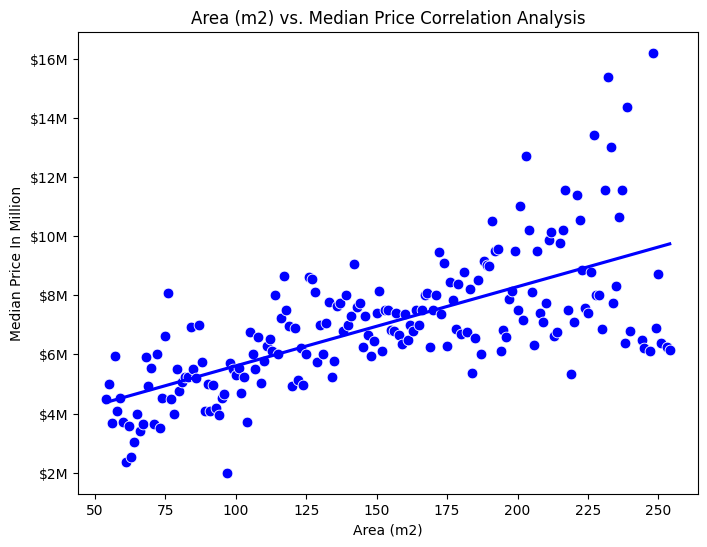

In [15]:
area_median_price_correlation_coefficient = float(area_median_price_correlation['area_m2'].corr(area_median_price_correlation['median_price']))
area_median_price_correlation_coefficient # 0.6785890752455856

plt.figure(figsize=(8,6))
scatter_1 = sns.scatterplot(
    data=area_median_price_correlation,
    x='area_m2',
    y='median_price',
    s=60,
    color='blue',
    alpha=1
)
sns.regplot(
    data=area_median_price_correlation,
    x='area_m2',
    y='median_price',
    scatter=False,
    ax=scatter_1,
    color='blue',
    ci=None
)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, position: f"${int(y / 1000000)}M"))
plt.title('Area (m2) vs. Median Price Correlation Analysis')
plt.ylabel('Median Price In Million')
plt.xlabel('Area (m2)')

**Actionable Insights:**

- The **scatter plot** shows a **positive correlation** between the **area of apartments** and their **median prices**. This is supported by the correlation coefficient of approximately **0.679**, indicating a **moderate to strong positive linear relationship**. As the area increases, the median price tends to increase as well.

- The **regression line** in the plot **slopes upwards**, **reinforcing the positive relationship**. This line helps visualize the general trend that larger apartments tend to have higher median prices.

- While there is a general upward trend, there is also a **noticeable spread of data points around the regression line**. This spread indicates variability in apartment prices that **isn't solely explained by the are**a. Other factors such as **location, property condition, and market demand** could also influence prices.